In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [10]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.measurement'>, <class 'sqlalchemy.ext.automap.station'>]


In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
query = "SELECT max(date) from measurement"

with engine.connect() as con:
    print(con.execute(text(query)).fetchall())

[('2017-08-23',)]


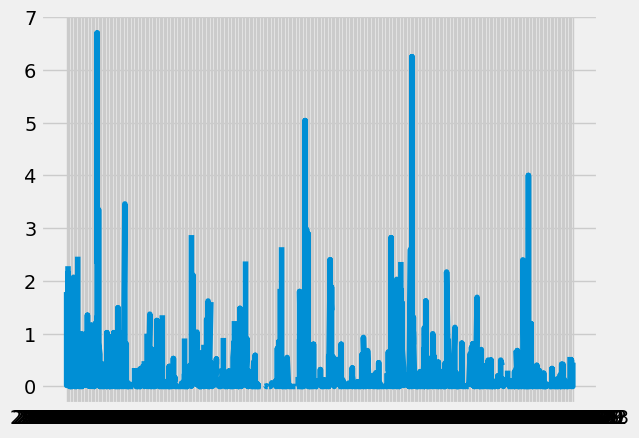

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2016,8,23)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=["Date","Precipitation"])

# Sort the dataframe by date
df = df.sort_values(by="Date",ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(df.Date, df.Precipitation)
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
query2 = "SELECT count(id) from station"

with engine.connect() as con:
    print(con.execute(text(query2)).fetchall())

[(9,)]


In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query3 = """
    SELECT station, count(*) as num_rows
    FROM measurement
    GROUP BY station
    ORDER BY num_rows desc;
"""

with engine.connect() as con:
    print(con.execute(text(query3)).fetchall())

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query4 = """
    SELECT min(tobs) as min_temp, avg(tobs) as avg_temp, max(tobs) as max_temp
    FROM measurement
    WHERE station = 'USC00519281';
"""

with engine.connect() as con:
    print(con.execute(text(query4)).fetchall())

[(54.0, 71.66378066378067, 85.0)]


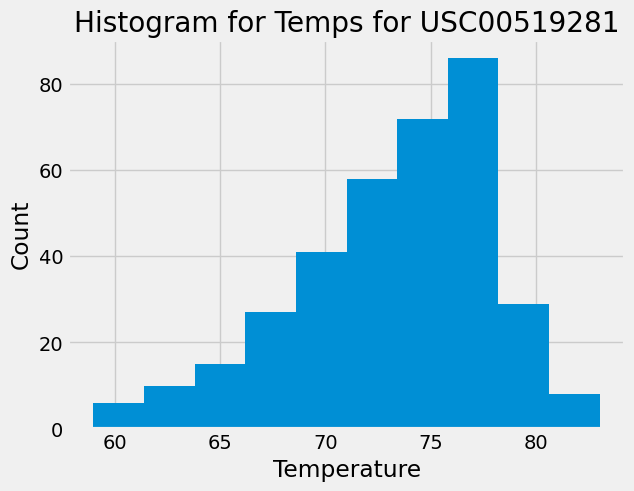

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query5 = """
    SELECT date, station, tobs
    FROM measurement
    WHERE date >= '2016-08-23' and station = 'USC00519281'
    ORDER BY date ASC;
"""

df = pd.read_sql(text(query5), con=engine)
plt.hist(df.tobs)
plt.ylabel("Count")
plt.xlabel("Temperature")
plt.title("Histogram for Temps for USC00519281")
plt.show()

# Close Session

In [31]:
# Close Session
session.close()
